### Анализ данных с помощью библиотеки Pandas

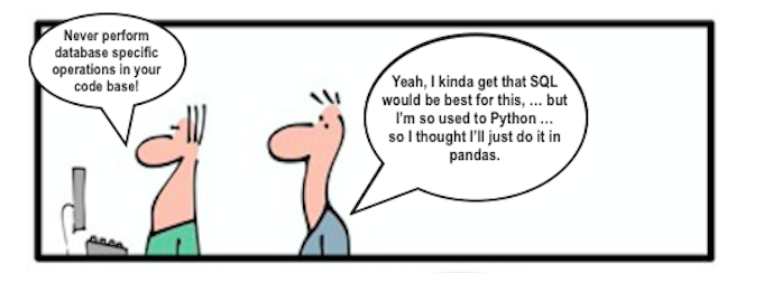

**Pandas** - это высокоуровневая Python библиотека для анализа данных, построена она поверх более низкоуровневой библиотеки NumPy (написана на Си), что является большим плюсом в производительности. В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных. 

Основными структурами данных в Pandas являются классы **Series** и **DataFrame**.

### Pandas Series

Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

In [1]:
import pandas as pd
import numpy as np
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

**Задание ассоциативных меток:**

In [2]:
my_series2 = pd.Series(
    data=[5, 6, 7, 8, 9, 10],
    index=['a', 'b', 'c', 'd', 'e', 'f'],
    name='simple_series',
    dtype='float64'
)#создание из двух списков
my_series2

a     5.0
b     6.0
c     7.0
d     8.0
e     9.0
f    10.0
Name: contin, dtype: float64

In [3]:
my_series2['b']

6.0

In [4]:
list(my_series2.values)

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [5]:
list(my_series2.index)

['a', 'b', 'c', 'd', 'e', 'f']

**Фильтрация данных в Series**

In [6]:
(my_series2 > 6)#получение маски

a    False
b    False
c     True
d     True
e     True
f     True
Name: contin, dtype: bool

In [7]:
my_series2[(my_series2 > 6)]#фильтрация данных в серии

c     7.0
d     8.0
e     9.0
f    10.0
Name: contin, dtype: float64

### Pandas DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

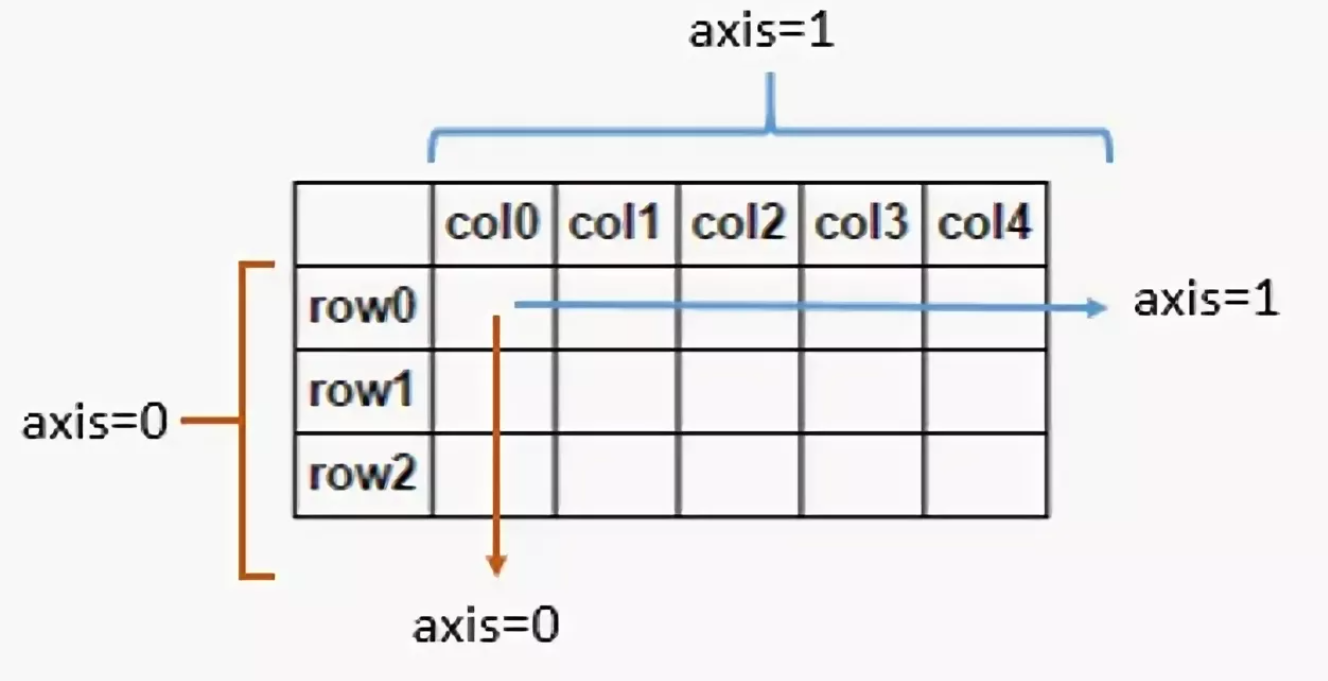

In [8]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})#создание датафрейма из словаря
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [9]:
df['population']#обращение к столбцу Датафрейма

0     17.04
1    143.50
2      9.50
3     45.50
Name: population, dtype: float64

In [10]:
type(df.population)

pandas.core.series.Series

In [11]:
df.index = ['KZ', 'RU', 'BY', 'UA']#зададим ассоциативные метки(индексы)
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


**Доступ к данным в DataFrame**

In [12]:
df.loc['KZ', 'country']

'Kazakhstan'

In [13]:
df.iloc[0, 2]

2724902

При использовании методов .loc и .iloc необходимо помнить, что первая часть относится к строкам, вторая - к столбцам.

Напишите программу, которая выберет из таблицы стан площадь и население Казахстана и России

In [14]:
df.loc[['KZ', 'RU'], ['square', 'population']]

,square,population
KZ,2724902,17.04
RU,17125191,143.50


**Фильтрация данных в DataFrame**

Для реализации фильтрации DataFrame необходимо изначально задать маску фильтрации

In [15]:
df[df.population > 10]#фильтрация по условию население >10

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
UA,Ukraine,45.50,603628


Рассмотрим более сложное составное условие

In [16]:
#более сложное условие
df[(df.square > 700000) & (df.population >10)].loc[:, ['population','square']]

,population,square
KZ,17.04,2724902
RU,143.50,17125191


**Создание новых столбцов в данных**

In [17]:
# Создаем новую колонку 
df['density'] = df['population'] / df['square'] * 1000000

**Удаление данных**

In [18]:
# Обратить внимание, что при дропе колонок необходимо в том или ином виде перезаписывать данные в исходном датафрейме
df.drop('density', axis=1)

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


**Экспорт данных**

In [19]:
df.to_csv('country_stats.csv')

In [20]:
# df.to_csv(filename) 
# df.to_excel(filename) 
# df.to_sql(table_name, connection_object)
# df.to_json(filename)
# df.to_html(filename)
# df.to_clipboard()

**Импорт данных**

In [21]:
pd.read_csv('country_stats.csv')

,Unnamed: 0,country,population,square,density
0,KZ,Kazakhstan,17.04,2724902,6.253436
1,RU,Russia,143.50,17125191,8.379469
2,BY,Belarus,9.50,207600,45.761079
3,UA,Ukraine,45.50,603628,75.377550


In [22]:
# pd.read_excel('filename')
# pd.read_sql(query,connection_object) 
# pd.read_table(filename)
# pd.read_json(json_string)
# pd.read_html(url) 
# pd.read_clipboard()
# pd.DataFrame(dict)

### Работа реальными с данными с помощью Pandas

Источник данных - https://www.kaggle.com/nasa/meteorite-landings.

Pipline data sientist'а по работе с данными

**1).Загрузим исходные данные.**

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/AndreyRysistov/VebinarDST/main/meteorite-landings.csv', sep = ',')
# df.to_csv('files/lesson_2/meteorite-landings-output.csv', index = False)

**2).Посмотрим на первые(последние) строки файла.**

In [24]:
df.head()
#df.tail()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


**3).Посмотрим на размер данных, названия признаков и их типы.**

In [25]:
df.shape

(45716, 10)

In [26]:
print('Количество строк: {}'.format(df.shape[0]))
print('Количество столбцов: {}'.format(df.shape[1]))
print('Список столбцов: ', list(df.columns))

Количество строк: 45716
Количество столбцов: 10
Список столбцов:  ['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong', 'GeoLocation']


**4).Посмотрим общую информацию по датафрейму.**

Для просмотра числовых статистик можно воспользоваться методом *describe*: 

In [27]:
df.describe()#описание по числовым столбцам

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [28]:
df.describe(include=['object'])#описание по категориальным столбцам

,name,nametype,recclass,fall,GeoLocation
count,45716,45716,45716,45716,38401
unique,45716,2,466,2,17100
top,Elephant Moraine 92114,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45641,8285,44609,6214


Информация о колонках датафрейма:

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


**5) Анализ данных**

Сначала разберемся с **числовыми** характеристиками

Сортируем наши данные по году падения метеорита

In [30]:
df = df.sort_values(by='year')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301.0,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601.0,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.183330, 12.733330)"


Из полученного ранее анализа видно, что год падения метеорита кодируется числом типа float64, что не имеет никакого смысла, ведь год - это целочисленный параметр

In [31]:
df['year'] = df['year'].astype(pd.Int64Dtype())
print(df['year'].dtype)

Int64


Посмотрим на максимальный и минимальный год падения метеоритов, для этого воспользуемся агрегратной функцией max

In [32]:
df['year'].min()

301

In [33]:
df['year'].max()

2501

На дворе 2021 год, данные были собраны в 2016, что это за аномалия такая? Прыжок в будущее? Нет, это выброс. Посмотрим повнимательнее

In [34]:
df[(df['year']>2016) | (df['year']<860)]#фильтрация данных

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)"
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.00000,0.00000,"(0.000000, 0.000000)"
38188,Ur,24125,Valid,Iron,NaN,Found,2501,30.90000,46.01667,"(30.900000, 46.016670)"


В описании данных, предоставленных NASA сказано, что стоит доверять только статистике с 860 до 2016 год. Поэтому смело избавляемся от этих четырех пришельцев

In [35]:
df.drop(df[(df['year']>2016) | (df['year']<860)].index, inplace=True)

С годом разобрались, поехали очищать наши данные дальше. Посмотрим на массу метеоритов. Расчитаем среднюю, минимальную, максимальную массу и ее стандартное отклонение

In [36]:
print('Средняя масса метеорита: {}'.format(df['mass'].mean()))
print('Минимальная масса метеорита: {}'.format(df['mass'].min()))
print('Максимальная масса метеорита: {}'.format(df['mass'].max()))
print('СКО массы метеорита: {}'.format(df['mass'].std()))

Средняя масса метеорита: 13278.651682381636
Минимальная масса метеорита: 0.0
Максимальная масса метеорита: 60000000.0
СКО массы метеорита: 575001.4841451709


Снова какие-то аномалии с массой метеорита. Посмотрим, насколько правдоподобна нулевая масса метеорита

In [37]:
df[df['mass'] == 0].shape[0]

19

Напишите код, который бы рассчитал долю метеоритов с нулевой массой среди всех метеоритов

Процент метеоритов с нулевой массой очень мал. Смело выкидываем такие камни

In [38]:
df.drop(df[df['mass']==0].index, axis=0, inplace=True)

Последней числовой характеристикой, которую мы проанализируем будет геолокация падения метеорита. Так как столбцы reclat и relong обозначают то же самое, что и GeoLocation, рассмотрим только последний

In [39]:
df['GeoLocation'].value_counts()

(0.000000, 0.000000)        6212
(-71.500000, 35.666670)     4761
(-84.000000, 168.000000)    3040
(-72.000000, 26.000000)     1505
(-79.683330, 159.750000)     657
                            ... 
(38.166670, -79.083330)        1
(34.756370, -114.234350)       1
(18.830620, 54.766450)         1
(19.178670, 54.874170)         1
(27.510560, 3.891110)          1
Name: GeoLocation, Length: 17096, dtype: int64

Значения нулевой широты и долготы соответствуют западному побережью Антарктиды, вряд ли кто-то бы стал искать там упавшие метеориты. Снова очередной выброс, причем довольно большой. Как вы думаете, что нам стоит сделать с этими данными?

Займемся анализом **категориальных признаков**:

Рассмотрим доли упавших и найденных метеоритов:

In [40]:
df['fall'].value_counts(normalize=True)#получение количества каждой категории

Found    0.975773
Fell     0.024227
Name: fall, dtype: float64

Посмотрим на признак класса метеорита. Класс метеорита формируется из его химических, физических и других характеристик. Подробнее в статье: https://en.wikipedia.org/wiki/Meteorite_classification

In [41]:
df['recclass'].nunique()#получение уникальных категорий

465

Самое частовстречающееся значение называется **модальным значением** или **модой**.

In [42]:
df['recclass'].mode()[0]#получение модального значения

'L6'

Следующий столбец на очереди, который надо посмотреть - столбец типа метеорита.

In [43]:
df['nametype'].value_counts()

Valid     45636
Relict       57
Name: nametype, dtype: int64

Переведем название класса метеорита в нижний регистр

In [44]:
def get_new_recclass(value):
    return value.lower()
df['recclass'].apply(get_new_recclass)#применение функции к столбцу

703                l6
678        stone-uncl
278         iron, iid
852        stone-uncl
283               ll6
             ...     
38128    mesosiderite
38201              h5
38224     iron, iiiab
38328              h5
45700    iron, iva-an
Name: recclass, Length: 45693, dtype: object

**Пропущенные значения**

In [45]:
df.isna().sum()/df.count() * 100

name            0.000000
id              0.000000
nametype        0.000000
recclass        0.000000
mass            0.283118
fall            0.000000
year            0.634291
reclat         19.060399
reclong        19.060399
GeoLocation    19.060399
dtype: float64

Итого, что мы видим. У нас 0.28% пропущенных значений в столбце mass. 0.63% пропущенных значений в столбце year. И нам также неизвестно местоположение 19% метеоритов. К тому же вспомним про метеориты, упавшие в Антарктиде.

Год и массу мы без раздумий можем заполнить медианным и модальным значением. А вот пропущенную геолокацию мы скрипя зубами выбрасываем из нашего рассмотрения, уж слишком много у нас неизвестности в них.

In [46]:
df['mass'].fillna(df['mass'].median(), inplace=True)#замена данных медианой
df['year'].fillna(df['year'].mode()[0], inplace=True)#замена данных модой

In [47]:
df.dropna(inplace=True, subset =['GeoLocation'])#выкидываем пропущенные данные о геолокации
df.drop(df[df['GeoLocation']=='(0.000000, 0.000000)'].index, inplace=True)#выкидываем метеориты из Антарктиды

In [48]:
df.shape

(32166, 10)

In [49]:
df.isna().sum()/df.count() * 100

name           0.0
id             0.0
nametype       0.0
recclass       0.0
mass           0.0
fall           0.0
year           0.0
reclat         0.0
reclong        0.0
GeoLocation    0.0
dtype: float64

**Методы группировки данных**

Метод **groupby**
![](https://i.stack.imgur.com/sgCn1.jpg)

- Разделение данных по группап по определенному критерию

- Применение к каждой группе определенной функции

- Сложение результатов в единую структуру

Рассмотрим какую среднюю массу имеют найденные и упавшие метеориты

In [50]:
#Получение информации по конкретному признаку с помощью группировки
df.groupby(by='fall')['mass'].mean()

fall
Fell     46163.365356
Found    17485.480561
Name: mass, dtype: float64

А теперь попробуем понять, что особенного в массе реликтовых метеоритов

In [51]:
#Применение различных агрегирующих функций
df.groupby(by = 'nametype')['mass'].agg([np.mean, np.std, np.min, np.max])

,mean,std,amin,amax
nametype,,,,
Relict,30.841885,7.523501,0.013,3.268500e+01
Valid,18492.474487,684880.904890,0.010,6.000000e+07


In [52]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
703,Nogata,16988,Valid,L6,472.000,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,32.685,Fell,920,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.000,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"
852,Rivolta de Bassi,22614,Valid,Stone-uncl,103.300,Fell,1490,45.48333,9.51667,"(45.483330, 9.516670)"
283,Ensisheim,10039,Valid,LL6,127000.000,Fell,1491,47.86667,7.35000,"(47.866670, 7.350000)"


In [53]:
new_df = df.drop(['reclat', 'reclong'], axis=1)
new_df.to_csv('new_data.csv')

**А теперь порешаем задачки**

Найдите метеориты, масса которых больше их медианного значения

Найдите среднюю массу метеоритов класса Stone-uncl

### Спасибо за внимание! Буду рад ответить на ваши вопросы
    
Полезные обучающие ссылки:

https://khashtamov.com/ru/pandas-introduction/

https://habr.com/ru/company/ruvds/blog/442516/

https://proglib.io/p/pandas-tricks/

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html